# Homework 1

## Collaboration
I disussed the homework with Rhea Halebeed and TA's and Ca's. I also used the lecture notes from 210 and referenced my notes. I also used the link given to us on the Homework to figure out the Markdown cells. 

I used this website https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html to get further information about the get_dummies function in pandas. 

# Task 1

# Title
## Section 1: Different fonts
### Regular. **Bold**. *Italic* . 

## Section 2: Enumeration
* First bullet
* Second bullet
    1. A 
    2. B
* Third bullet
    * Sub-bullet 
    * Sub-bullet

## Section 3: Code
This is inline code: `[x*x for x in X]` , and this is a block of code (note the 
syntax highlighting!):

```python
# comment
    def foo(x,y,z)
        return x + 10 * y + 100 * z
```

# Task 2

importing the data set and reading the file. 

In [1]:
import pandas as pd
def print_file(student_performance):
    with open(student_performance) as f:
        print(f.read(),end='')

In [2]:
student_performance = 'student-mat.csv'
print_file(student_performance)

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6
"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6
"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10
"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15
"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";10
"GP";"M";16;"U";"LE3";"T";4;3;"services";"other";"reputation";"mot

In [3]:
df= pd.read_csv(student_performance, sep=';')
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

Get basic information from the data set. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
#checking for null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no null values in the data set. 

In [6]:
# drop the the columns that I do not want to predict.
# I just want to look at "G3"
df = df.drop(columns=['G2','G1'])

Now I will be changing most of the object data types into booleans

I will be doing this with the following columns:

* sex
* schoolsup
* famsup
* paid 
* activities
* nursery
* higher
* internet
* romantic
* Pstatus
* address
* famsize
* school

In [7]:
df['sex'] = df['sex'].replace({'F': True, 'M': False})
df['schoolsup'] = df['schoolsup'].replace({'yes': True, 'no': False})
df['famsup'] = df['famsup'].replace({'yes': True, 'no': False})
df['paid'] = df['paid'].replace({'yes': True, 'no': False})
df['activities'] = df['activities'].replace({'yes': True, 'no': False})
df['nursery'] = df['nursery'].replace({'yes': True, 'no': False})
df['higher'] = df['higher'].replace({'yes': True, 'no': False})
df['internet'] = df['internet'].replace({'yes': True, 'no': False})
df['romantic'] = df['romantic'].replace({'yes': True, 'no': False})
df['Pstatus'] = df['Pstatus'].replace({'A': True, 'T': False})
df['address'] = df['address'].replace({'U': True, 'R': False})
df['famsize'] = df['famsize'].replace({'GT3': True, 'LE3': False})
df['school'] = df['school'].replace({'GP': True, 'MS': False})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    bool  
 1   sex         395 non-null    bool  
 2   age         395 non-null    int64 
 3   address     395 non-null    bool  
 4   famsize     395 non-null    bool  
 5   Pstatus     395 non-null    bool  
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    bool  
 16  famsup      395 non-null    bool  
 17  paid        395 non-null    bool  
 18  activities  395 non-null    bool  
 19  nursery     395 non-null    bool  
 20  higher    

#### Some of the data types are still in the data type object. To change this I used the get_dummies function from the pandas library. 

See this link: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
to find further information about the function. 

In [9]:
df = pd.get_dummies(df, columns= None)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    bool 
 1   sex                395 non-null    bool 
 2   age                395 non-null    int64
 3   address            395 non-null    bool 
 4   famsize            395 non-null    bool 
 5   Pstatus            395 non-null    bool 
 6   Medu               395 non-null    int64
 7   Fedu               395 non-null    int64
 8   traveltime         395 non-null    int64
 9   studytime          395 non-null    int64
 10  failures           395 non-null    int64
 11  schoolsup          395 non-null    bool 
 12  famsup             395 non-null    bool 
 13  paid               395 non-null    bool 
 14  activities         395 non-null    bool 
 15  nursery            395 non-null    bool 
 16  higher             395 non-null    bool 
 17  internet        

#### All data types are now either an intiger or a boolean. Now I moved on to creating the y value as "G3" and the df is all of the columns except "G3" (I am dropping "G3")

In [11]:
y = df['G3']
df = df.drop(columns= ['G3'])


#### Creating a variable results that will hold the results of the decision tree (number of nodes, the number of features and the accuracy for the problem.

In [12]:
result = []
result1 = []

# Decision Tree Regressor

In [13]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)


In [14]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import mpl_toolkits
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree


for tree in [5, 10, 15, 20, 25, 30]:
    for f in [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]:
        #sel_features = X_train.columns[:f]
        X_train_new = X_train.iloc[:,:f]
        X_test_new = X_test.iloc[:,:f]
        
        clf = DecisionTreeRegressor(max_leaf_nodes=tree)
        clf.fit(X_train_new, y_train)
        y_pred = clf.predict(X_test_new)
    
    
        # Inside the loop after y_pred calculation
        score = mean_squared_error(y_test, y_pred)
        
        
        # Store results for plotting
        result.append([tree, f, score])

In [15]:
# turning the variable result into a data frame
import pandas as pd
results = pd.DataFrame(result, columns=['Number of Nodes', 'Number of Features', 'Mean Square Error'])
results

,Number of Nodes,Number of Features,Mean Square Error
0,5,3,17.032154
1,5,6,16.551011
2,5,9,17.445621
3,5,12,17.751298
4,5,15,18.180356
5,5,18,19.351114
6,5,21,17.497058
7,5,24,18.506589
8,5,27,18.110423
9,5,30,18.110423


In [16]:
# The best prediction using the Mean Square Error
lowest = results['Mean Square Error'].min()
lowest

15.441994198503236

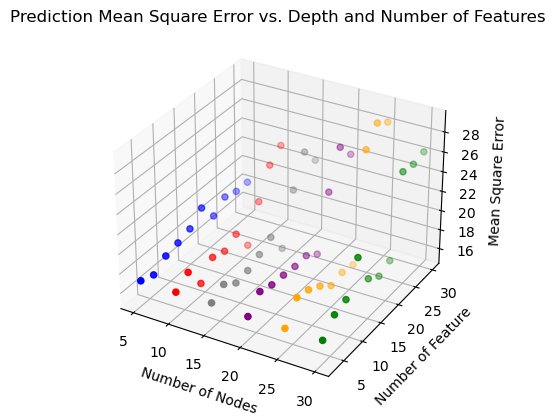

In [17]:
#3D graoh of the model looking at Prediction Mean Square Error vs. Depth and Number of Features
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(results['Number of Nodes'].iloc[:10], results['Number of Features'][:10],
           results['Mean Square Error'][:10], c='blue', marker='o')

ax.scatter(results['Number of Nodes'].iloc[10:20], results['Number of Features'][10:20],
           results['Mean Square Error'][10:20], c='red', marker='o')

ax.scatter(results['Number of Nodes'].iloc[20:30], results['Number of Features'][20:30],
           results['Mean Square Error'][20:30], c='grey', marker='o')

ax.scatter(results['Number of Nodes'].iloc[30:40], results['Number of Features'][30:40],
           results['Mean Square Error'][30:40], c='purple', marker='o')

ax.scatter(results['Number of Nodes'].iloc[40:50], results['Number of Features'][40:50],
           results['Mean Square Error'][40:50], c='orange', marker='o')

ax.scatter(results['Number of Nodes'].iloc[50:60], results['Number of Features'][50:60],
           results['Mean Square Error'][50:60], c='green', marker='o')

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Feature')
ax.set_zlabel('Mean Square Error')
plt.title('Prediction Mean Square Error vs. Depth and Number of Features')
plt.show()

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import mpl_toolkits
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import tree


for tree in [5, 10, 15, 20, 25, 30]:
    for f in [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]:
        #sel_features = X_train.columns[:f]
        X_train_new = X_train.iloc[:,:f]
        X_test_new = X_test.iloc[:,:f]
        
        clf = DecisionTreeClassifier(max_leaf_nodes=tree)
        clf.fit(X_train_new, y_train)
        #y_pred = clf.predict(X_test_new)
    
    
        # calculate the accuracy of the model 
        score = clf.score(X_test_new, y_test)
        
        
        
        # Store results for plotting
        result1.append([tree, f, score])

In [19]:
# turning the variable result into a data frame
import pandas as pd
results1 = pd.DataFrame(result1, columns=['Number of Nodes', 'Number of Features', 'Accuracy Score'])
results1

,Number of Nodes,Number of Features,Accuracy Score
0,5,3,0.113924
1,5,6,0.101266
2,5,9,0.101266
3,5,12,0.101266
4,5,15,0.088608
5,5,18,0.101266
6,5,21,0.063291
7,5,24,0.164557
8,5,27,0.202532
9,5,30,0.202532


In [20]:
#Highest accuracy.
highest = results1['Accuracy Score'].max()
print(highest)

0.20253164556962025


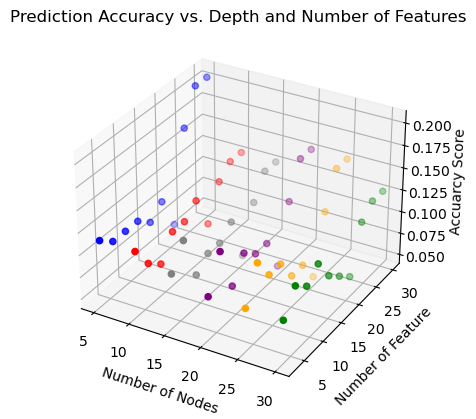

In [21]:
# Plotting the  3D plot to visualize, node and feature number and the accuracy score. 
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(results1['Number of Nodes'].iloc[:10], results1['Number of Features'][:10],
           results1['Accuracy Score'][:10], c='blue', marker='o')

ax.scatter(results1['Number of Nodes'].iloc[10:20], results1['Number of Features'][10:20],
           results1['Accuracy Score'][10:20], c='red', marker='o')

ax.scatter(results1['Number of Nodes'].iloc[20:30], results1['Number of Features'][20:30],
           results1['Accuracy Score'][20:30], c='grey', marker='o')

ax.scatter(results1['Number of Nodes'].iloc[30:40], results1['Number of Features'][30:40],
           results1['Accuracy Score'][30:40], c='purple', marker='o')

ax.scatter(results1['Number of Nodes'].iloc[40:50], results1['Number of Features'][40:50],
           results1['Accuracy Score'][40:50], c='orange', marker='o')

ax.scatter(results1['Number of Nodes'].iloc[50:60], results1['Number of Features'][50:60],
           results1['Accuracy Score'][50:60], c='green', marker='o')

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Feature')
ax.set_zlabel('Accuarcy Score')
plt.title('Prediction Accuracy vs. Depth and Number of Features')
plt.show()

# Summary: 
When looking at the Classifier the accuracy is the highest when there are the most amount of features used, which makes sense because the tree has the most amount of information. This is not always the case but mostly.  
Overall the tree that used only 5 nodes performed the best. This is visible in the graph above (see blue dots). The dots are the highest, meaning that the accuracy score is the highest. 

When looking at the Regressor the pattern is about the same as for the regressor. The lower the points are on the graph the better the prediction since the prediction has to be as low as possible to zero. Overall the tree perdoremd the best for a depth of 10. However it overall did not perform very well. 

Something I learned was that you cannot use the accuracy score for Regression. And that was why my model looked like it was overfitting at first. After I fixed it it now works ok. 

Also I did not indend to create both a Regressor and a Classifier model. 

# Task 3:

Overall the assignment took me about 8 hours. For the most part fixing errors. In the beginning I struggled with fully understanding the assignment, especially the part about the amount of features and the graph. 